<a href="https://colab.research.google.com/github/victor-soeiro/IntroPython-UERJ/blob/master/Exerc%C3%ADcios/Victor_Soeiro_Aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercício 2**

Faça modificações similares para permitir que o usuário mude a cor da tartaruga durante a execução do programa. Faça o mesmo para a largura da caneta da tartaruga.


In [1]:
!pip3 install ColabTurtle

In [2]:
import ColabTurtle.Turtle as t

t.initializeTurtle()

# input_color = input("Cor: ")
input_color = "white"
if input_color in t.VALID_COLORS:
  t.color(input_color)

# input_pensize = int(input("Tamanho da caneta: "))
input_pensize = 10
t.width(input_pensize)

for i in range(4):
  t.forward(100)
  t.left(90)

## **Exercício 3**

Investiguem os métodos e atributos do módulo turtle (ColabTurtle no Google Colab).

In [3]:
print(help(t))

Help on module ColabTurtle.Turtle in ColabTurtle:

NAME
    ColabTurtle.Turtle

FUNCTIONS
    backward(units)
        # makes the turtle move backward by 'units' units
    
    bgcolor(color)
        # change the background color of the drawing area; valid colors are defined at VALID_COLORS
    
    color(color)
        # change the color of the pen; valid colors are defined at VALID_COLORS
    
    forward(units)
        # makes the turtle move forward by 'units' units
    
    goto(x, y)
        # move the turtle to a designated 'x'-'y' coordinate
    
    hideturtle()
        # switch turtle visibility to ON
    
    initializeTurtle(initial_speed=4, initial_window_size=(800, 500))
        # construct the display for turtle
    
    left(degrees)
        # makes the turtle move right by 'degrees' degrees (NOT radians)
    
    pendown()
        # lowers the pen such that following turtle moves will now cause drawings
    
    penup()
        # raises the pen such that following turt

## **Exercício 4**

Mude a velocidade com que a tartaruga faz o desenho.

In [4]:
t.initializeTurtle()
t.speed(10)

for i in range(4):
  t.forward(100),
  t.left(90)

## **Exercício 5**

Sabendo que o ângulo interno da ponta de uma estrela de 5 pontas é de 36 graus, desenhe uma estrela.

In [5]:
t.initializeTurtle()

t.left(90)
for i in range(5):
  t.forward(250)
  t.left(180 - 36)

## **Exercício 6**

Sabendo o ângulo interno da ponta de uma estrela, desenhe quatro estrelas em uma janela, com uma certa distância entre elas. 

In [6]:
t.initializeTurtle()
t.speed(5)

def estrela(t, size):
  t.left(90)
  for i in range(5):
    t.forward(size)
    t.left(144)

for i in range(3):
  estrela(t, 100)
  t.penup()

  t.right(180)
  t.forward(160)
  t.left(90)

  t.pendown()


## **PARTE 2 - Exercício 1**

**Escreva um conjunto apropriadamente geral de funções que possam desenhar flores como na figura abaixo:**

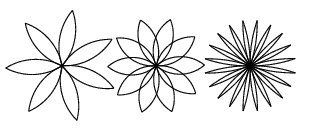


Primeiramente, iremos definir uma função que desenhe uma elipse rotacionada, onde a equação paramétrica é dada por:

$x = a \cos(\theta) \cos(\alpha) - b \sin(\theta) \sin(\alpha)$

$y = a \cos(\theta) \sin(\alpha) + b \sin(\theta) \cos(\alpha)$

Onde, $\alpha$ é o ângulo de rotação da elipse.

In [ ]:
import ColabTurtle.Turtle as t
from math import cos, sin, pi

def elipse(t, a, b, cx=None, cy=None, rot=0, ang=360, steps=50):
    """
    Desenha uma elipse usando o módulo ColabTurtle.

    :param t: Objeto ColabTurtle.Turtle.
    :param a: Valor do eixo x.
    :param b: Valor do eixo y.
    :param cx: Componente cartesiana x do centro da elipse.
    :param cy: Componente cartesiana y do centro da elipse.
    :param rot: Rotação da elipse em torno do seu centro.
    :param ang: Ângulo do arco da elipse.
    :param steps: Passos do ângulo do desenho da elipse.
    """
    if cx is None:
        cx = t.window_size[0] / 2

    if cy is None:
        cy = t.window_size[1] / 2

    rot = rot * (pi / 180)

    for i in range(int(ang * 0.875 * steps / 50)):
        if i == 0:
            t.penup()
            t.goto(int(cx), int(cy))

        else:
            t.pendown()
        
        t.goto(x=int(a * cos(i / steps) * cos(rot)
               - b * sin(i / steps) * sin(rot) + cx),
               y=int(a * cos(i / steps) * sin(rot)
               + b * sin(i / steps) * cos(rot) + cy))

A função acima desenhará a elipse em um centro (cx, cy), porém, para desenharmos pétalas de uma flor, necessitamos de um ponto em comum e não um centro em comum. Logo, vamos criar uma função que translada a elipse para criar uma pétala.

In [11]:
def petala(t, a, b, px=None, py=None, rot=0, steps=50):
    """
    Desenha uma pétula a partir do ponto (px, py).

    :param t: Objeto ColabTurtle.Turtle.
    :param a: Valor do eixo x.
    :param b: Valor do eixo y.
    :param px: Componente cartesiana x do ponto inicial da pétula.
    :param py: Componente cartesiana y do ponto inicial da pétula.
    :param rot: Rotação da elipse em torno do ponto (px, py).
    :param steps: Passos do ângulo do desenho da pétula.
    """
    if px is None:
        px = t.window_size[0] / 2

    if py is None:
        py = t.window_size[1] / 2

    rot_rads = rot * (pi / 180)

    elipse(t, a, b, px + a*cos(rot_rads), py + a*sin(rot_rads), rot, 360, steps)

Por fim, criando uma função para o desenho da flor.

In [16]:
def flor(t, a, b, n, cor="white", r=0, ang=0, steps=50):
    """
    Desenha uma flor.

    :param t: Objeto ColabTurtle.Turtle.
    :param a: Valor do eixo x.
    :param b: Valor do eixo y.
    :param n: Quantidade de pétulas.
    :param cor: A cor da flor.
    :param steps: Passos do ângulo do desenho da flor.
    """   
    if cor in t.VALID_COLORS:
        t.color(cor)

    alfa = 360 / n
    for i in range(n):
        px = r * cos((alfa * int(i) + ang) * (pi / 180)) + t.window_size[0] / 2
        py = r * sin((alfa * int(i) + ang) * (pi / 180)) + t.window_size[1] / 2

        petala(t, a, b, px, py, alfa*int(i) + ang, steps)


def talo(t, px, cor="white"):
    if cor in t.VALID_COLORS:
        t.color(cor)

    t.goto(px, 500)

In [19]:
t.initializeTurtle()
t.speed(10)

flor(t, a=100, b=20, n=6, r=5, ang=30, steps=10)

In [18]:
t.initializeTurtle()
t.speed(10)

flor(t, a=100, b=30, n=10, r=5, ang=30, steps=10)

In [21]:
t.initializeTurtle()
t.speed(10)

flor(t, a=100, b=10, n=19, r=10, ang=30, steps=10)